In [ ]:
# Import necessary libraries
import os
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import glob
from google.colab import drive
import zipfile
import albumentations as A
import cv2

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set random seed for reproducibility
np.random.seed(12345)

In [ ]:
# Define paths
base_path = '/content/drive/MyDrive/Construction_Site_Safety'
dataset_zip = '/content/drive/MyDrive/Construction Site Safety.v30.yolov8.zip'

In [ ]:
# Create base directory if it doesn't exist
os.makedirs(base_path, exist_ok=True)

In [ ]:
# Extract the dataset
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(base_path)

In [ ]:
# Set paths
Input_path = '/content/drive/MyDrive/Construction_Site_Safety'
Work_path = Input_path

In [ ]:
# Define classes
num_classes = 12
classes = ['Person', 'Safety Cone', 'NO-Safety Vest', 'Hardhat', 'NO-Mask', 'Safety Vest', 'NO-Hardhat', 'Gloves', 'Mask', 'dump truck', 'wheel loader', 'Ladder']

In [ ]:
# Create class index dictionary
class_idx = {str(i): classes[i] for i in range(num_classes)}

In [ ]:
# Create YAML file
dict_file = {
    'train': os.path.join(base_path, 'train', 'images'),
    'val': os.path.join(base_path, 'valid', 'images'),
    'test': os.path.join(base_path, 'test', 'images'),
    'nc': len(classes),
    'names': classes
}

In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs(Work_path, exist_ok=True)
print("Directory created:", Work_path)
print("Does Work_path exist now?", os.path.exists(Work_path))

Directory created: /content/drive/MyDrive/Construction_Site_Safety
Does Work_path exist now? True


In [ ]:
print("Work_path:", Work_path)
print("Does Work_path exist?", os.path.exists(Work_path))

Work_path: /content/drive/MyDrive/Construction_Site_Safety
Does Work_path exist? True


In [ ]:
# Save YAML file
yaml_path = os.path.join(Work_path, 'data.yaml')
try:
    with open(yaml_path, 'w') as file:
        yaml.dump(dict_file, file)
    print(f"YAML file successfully saved to: {yaml_path}")
except Exception as e:
    print(f"Error saving YAML file: {e}")

# Verify the file was created
print("Does YAML file exist?", os.path.exists(yaml_path))

YAML file successfully saved to: /content/drive/MyDrive/Construction_Site_Safety/data.yaml
Does YAML file exist? True


In [ ]:
# Initialize dictionaries for class statistics and dataset lengths
class_stat = {mode: {cls: 0 for cls in classes} for mode in ['train', 'valid', 'test']}
data_len = {}

In [ ]:
drive.mount('/content/drive')
print("Drive mounted at:", os.listdir('/content/drive'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted at: ['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0', '.Encrypted']


In [ ]:
print("Base path:", base_path)
print("Input path:", Input_path)
for mode in ['train', 'valid', 'test']:
    print(f"{mode} labels path:", os.path.join(Input_path, mode, 'labels'))

Base path: /content/drive/MyDrive/Construction_Site_Safety
Input path: /content/drive/MyDrive/Construction_Site_Safety
train labels path: /content/drive/MyDrive/Construction_Site_Safety/train/labels
valid labels path: /content/drive/MyDrive/Construction_Site_Safety/valid/labels
test labels path: /content/drive/MyDrive/Construction_Site_Safety/test/labels


In [ ]:
print("Extracted files:", os.listdir(base_path))

Extracted files: ['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'valid', 'train']


In [ ]:
# Analyze class distribution
for mode in ['train', 'valid', 'test']:
    class_count = {cls: 0 for cls in classes}
    path = os.path.join(Input_path, mode)
    if os.path.exists(path):
        labels_path = os.path.join(path, 'labels')
        if os.path.exists(labels_path):
            for file in os.listdir(labels_path):
                if file.endswith('.txt'):
                    file_path = os.path.join(labels_path, file)
                    with open(file_path, 'r') as f:
                        lines = f.readlines()
                    for line in lines:
                        cls = line.split()[0]
                        if cls in class_idx:
                            class_count[class_idx[cls]] += 1
            data_len[mode] = len([f for f in os.listdir(labels_path) if f.endswith('.txt')])
            class_stat[mode] = class_count
            print(f"\nClass distribution in {mode} set:")
            for cls, count in class_stat[mode].items():
                print(f" {cls}: {count} instances")
        else:
            print(f"Labels directory does not exist: {labels_path}")
    else:
        print(f"Directory does not exist: {path}")


Class distribution in train set:
 Person: 145 instances
 Safety Cone: 231 instances
 NO-Safety Vest: 385 instances
 Hardhat: 43 instances
 NO-Mask: 153 instances
 Safety Vest: 292 instances
 NO-Hardhat: 338 instances
 Gloves: 386 instances
 Mask: 808 instances
 dump truck: 16 instances
 wheel loader: 464 instances
 Ladder: 322 instances

Class distribution in valid set:
 Person: 12 instances
 Safety Cone: 25 instances
 NO-Safety Vest: 79 instances
 Hardhat: 10 instances
 NO-Mask: 21 instances
 Safety Vest: 69 instances
 NO-Hardhat: 74 instances
 Gloves: 106 instances
 Mask: 166 instances
 dump truck: 0 instances
 wheel loader: 44 instances
 Ladder: 41 instances

Class distribution in test set:
 Person: 9 instances
 Safety Cone: 40 instances
 NO-Safety Vest: 110 instances
 Hardhat: 5 instances
 NO-Mask: 28 instances
 Safety Vest: 41 instances
 NO-Hardhat: 79 instances
 Gloves: 90 instances
 Mask: 174 instances
 dump truck: 0 instances
 wheel loader: 92 instances
 Ladder: 61 instances


<ipython-input-28-414af603e8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[mode], y=df.index, ax=ax[i], palette=colors)
<ipython-input-28-414af603e8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[mode], y=df.index, ax=ax[i], palette=colors)
<ipython-input-28-414af603e8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[mode], y=df.index, ax=ax[i], palette=colors)


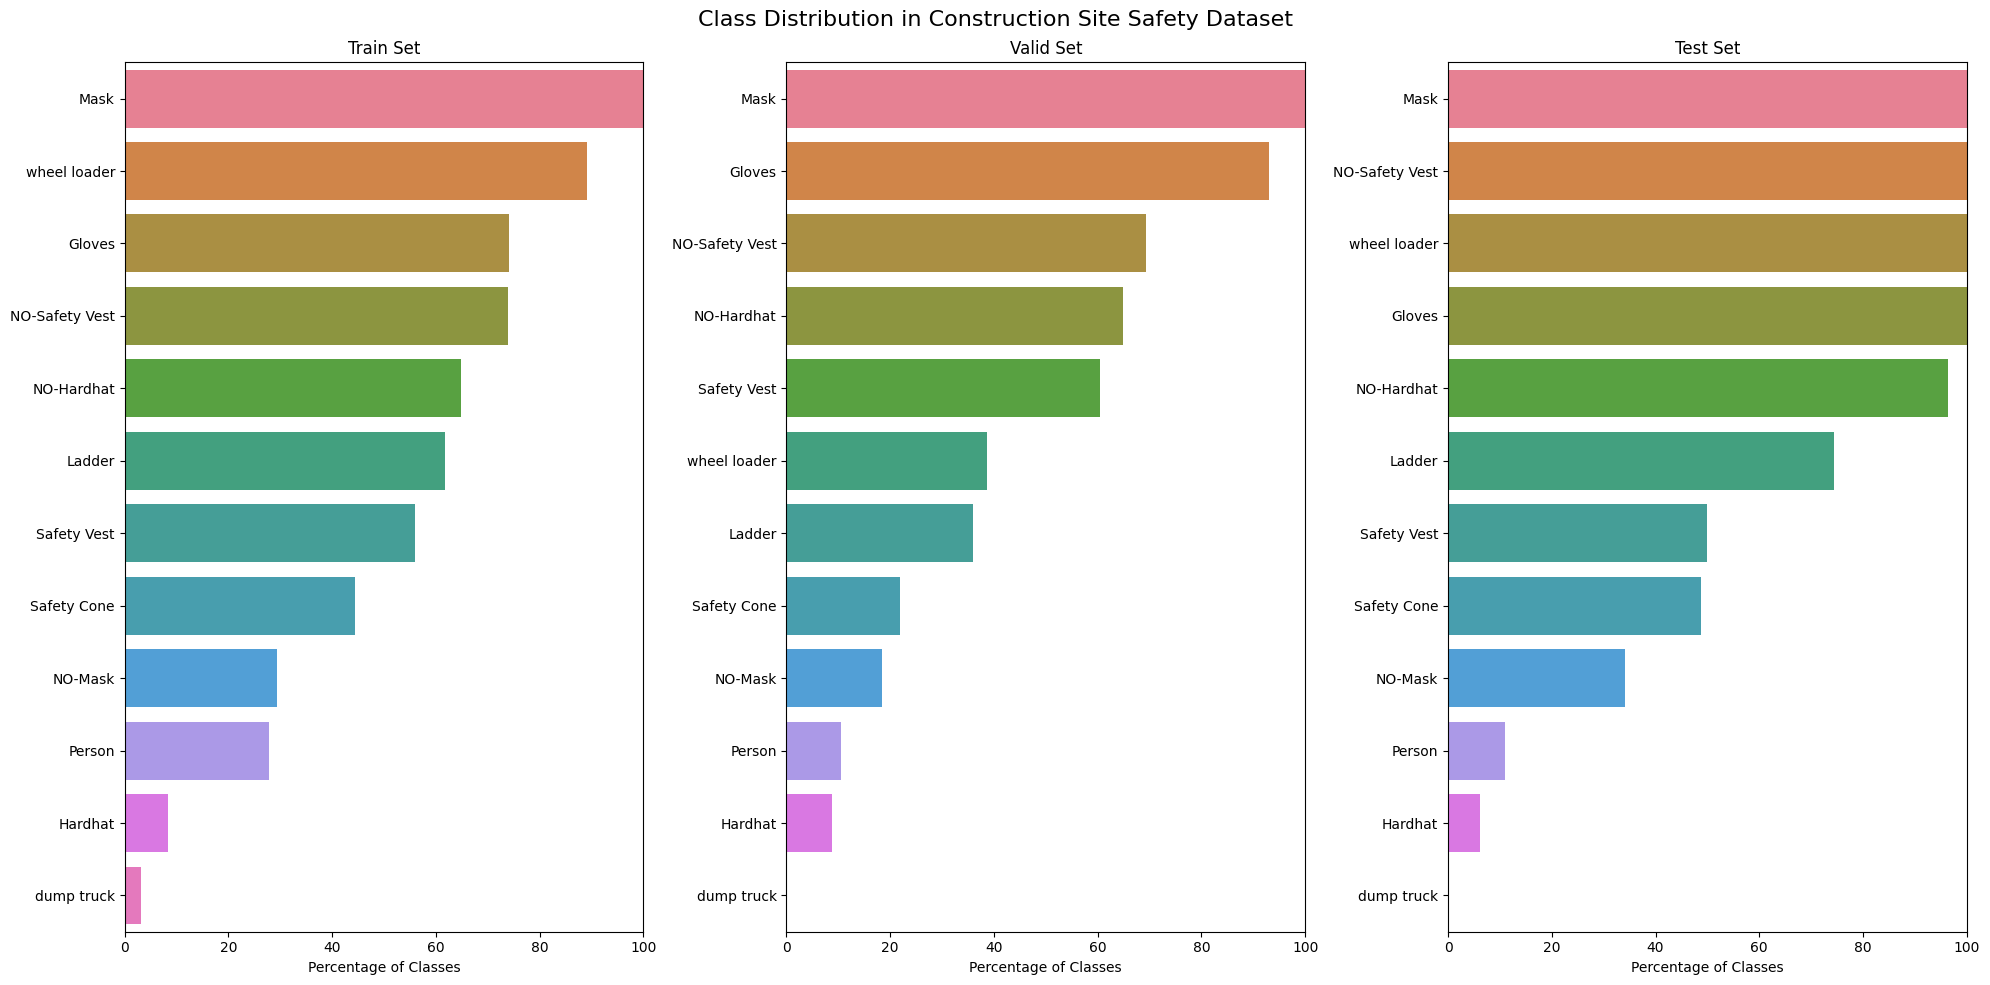

In [ ]:
# Plot class distribution
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Class Distribution in Construction Site Safety Dataset', fontsize=16)

colors = sns.color_palette('husl', n_colors=len(classes))

for i, mode in enumerate(['train', 'valid', 'test']):
    df = pd.DataFrame({mode: class_stat[mode]})
    df = df.T / data_len[mode] * 100
    df = df.T.sort_values(by=mode, ascending=False)

    sns.barplot(x=df[mode], y=df.index, ax=ax[i], palette=colors)
    ax[i].set_title(f"{mode.capitalize()} Set")
    ax[i].set_xlabel('Percentage of Classes')
    ax[i].set_xlim(0, 100)
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import os
import glob
from PIL import Image
import numpy as np
from tqdm import tqdm

def resize_and_pad_image(image_path, target_size=(640, 640)):
    with Image.open(image_path) as img:
        if img.mode != 'RGB':
            img = img.convert('RGB')
        scale = min(target_size[0] / img.width, target_size[1] / img.height)
        new_size = (int(img.width * scale), int(img.height * scale))
        resized_img = img.resize(new_size, Image.LANCZOS)
        new_img = Image.new('RGB', target_size, (128, 128, 128))
        paste_position = ((target_size[0] - new_size[0]) // 2,
                          (target_size[1] - new_size[1]) // 2)
        new_img.paste(resized_img, paste_position)
        return new_img

def process_images(base_path, target_size=(640, 640)):
    total_processed = 0
    for mode in ['train', 'valid', 'test']:
        input_path = os.path.join(base_path, mode, 'images')
        output_path = os.path.join(base_path, mode, 'resized_images')
        os.makedirs(output_path, exist_ok=True)

        files = glob.glob(os.path.join(input_path, '*'))
        for file in tqdm(files, desc=f"Processing {mode} images"):
            try:
                img = resize_and_pad_image(file, target_size)
                output_file = os.path.join(output_path, os.path.basename(file))
                img.save(output_file)
                total_processed += 1
            except Exception as e:
                print(f"Error processing {file}: {str(e)}")

    print(f"\nImage processing completed. Total images processed: {total_processed}")

# Usage
base_path = '/content/drive/MyDrive/Construction_Site_Safety'
process_images(base_path)

Processing test images: 100%|██████████| 82/82 [00:04<00:00, 17.21it/s]


Image processing completed. Total images processed: 727



Image sizes in train set:
	(640, 640): 531 images

Image sizes in valid set:
	(640, 640): 114 images

Image sizes in test set:
	(640, 640): 82 images


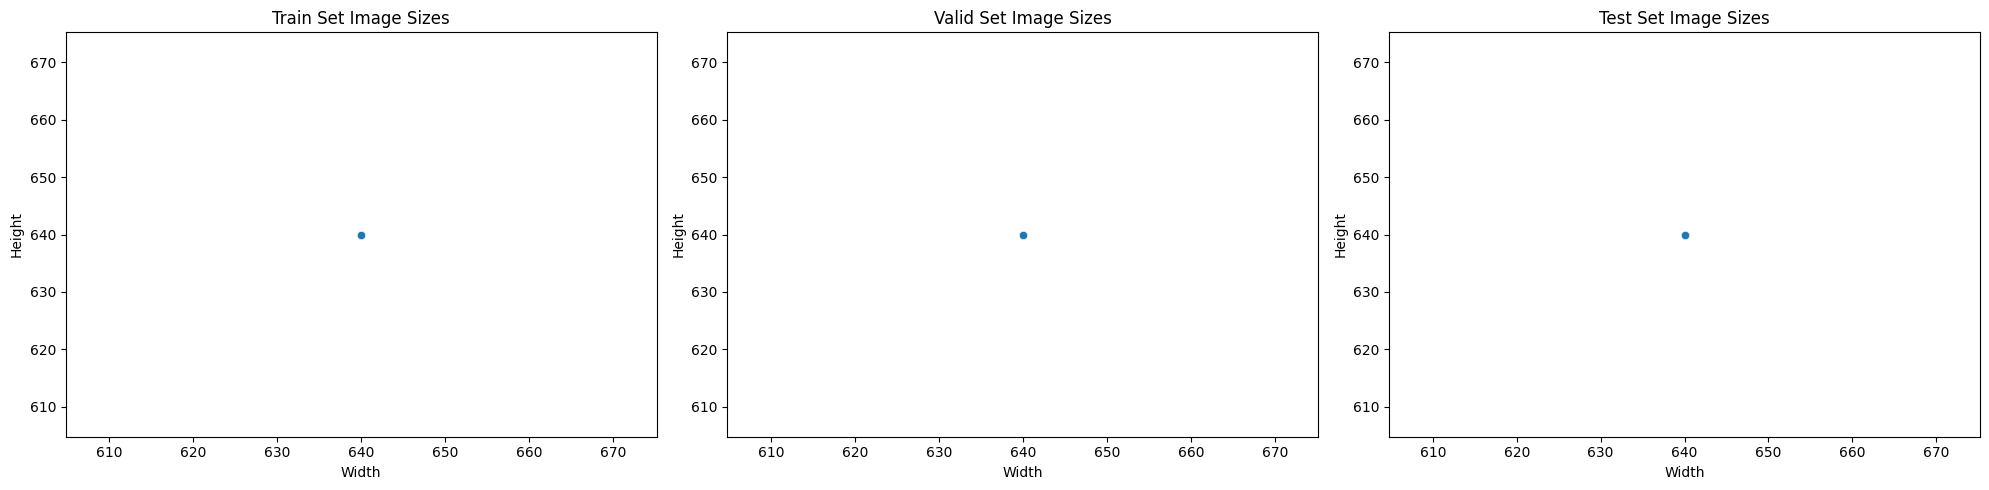

In [ ]:
import os
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_image_sizes(base_path, mode):
    sizes = []
    unique_sizes = set()
    size_counts = {}

    image_folder = os.path.join(base_path, mode, 'resized_images')
    if not os.path.exists(image_folder):
        print(f"Warning: The folder {image_folder} does not exist.")
        return pd.DataFrame()

    for file in glob.glob(os.path.join(image_folder, '*')):
        try:
            with Image.open(file) as img:
                size = img.size
                sizes.append(size)
                unique_sizes.add(size)
                size_counts[size] = size_counts.get(size, 0) + 1
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    print(f'\nImage sizes in {mode} set:')
    for size, count in sorted(size_counts.items(), key=lambda x: x[1], reverse=True):
        print(f'\t{size}: {count} images')

    return pd.DataFrame(sizes, columns=['width', 'height'])

def plot_image_sizes(base_path):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for i, mode in enumerate(['train', 'valid', 'test']):
        df = analyze_image_sizes(base_path, mode)
        if not df.empty:
            sns.scatterplot(data=df, x='width', y='height', ax=axes[i])
            axes[i].set_title(f'{mode.capitalize()} Set Image Sizes')
            axes[i].set_xlabel('Width')
            axes[i].set_ylabel('Height')
    plt.tight_layout()
    plt.show()

# Usage
base_path = '/content/drive/MyDrive/Construction_Site_Safety'
plot_image_sizes(base_path)